<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Production-and-Operations-Management/blob/main/Group_Technology%2C_GT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 문제 가정
6개의 부품(P1 ~ P6)
4개의 기계(M1 ~ M4)
부품-기계 행렬(0-1 행렬)에서 각 부품이 어느 기계에서 가공되는지 나타낸다.
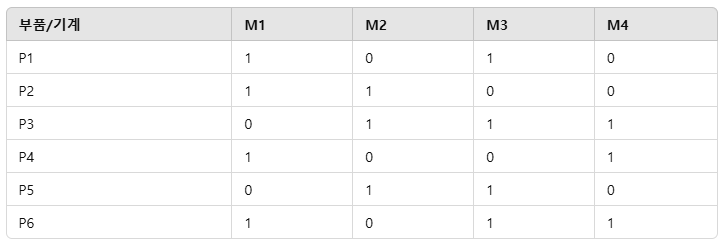



2. Python 코드 예시

  2.1 부품-기계 행렬 구성

    우선 Numpy를 사용하여 부품-기계 행렬을 생성합니다. 각 부품이 어느 기계에서 가공되는지 0과 1로 표현된 이진 행렬을 사용합니다.

In [4]:
import numpy as np

# 부품-기계 행렬 (0은 가공되지 않음, 1은 가공됨)
P_M_matrix = np.array([[1, 0, 1, 0],  # P1
                       [1, 1, 0, 0],  # P2
                       [0, 1, 1, 1],  # P3
                       [1, 0, 0, 1],  # P4
                       [0, 1, 1, 0],  # P5
                       [1, 0, 1, 1]]) # P6



   2.2 유사 계수(Similarity Coefficient) 계산
    
   두 부품 간에 공통으로 사용하는 기계의 수를 비교하여 유사 계수를 계산하는 함수를 만듭니다. 이 유사 계수를 통해 각 부품이 얼마나 유사한지 판단할 수 있습니다.

In [5]:
# 유사 계수(Similarity Coefficient) 계산 함수
def similarity_coefficient(part1, part2):
    common_machines = np.sum(part1 * part2)
    total_machines = np.sum(part1) + np.sum(part2) - common_machines
    return common_machines / total_machines if total_machines != 0 else 0

# 부품 간 유사 계수 출력 (예: P1과 P2 비교)
print("P1과 P2의 유사 계수:", similarity_coefficient(P_M_matrix[0], P_M_matrix[1]))
print("P1과 P3의 유사 계수:", similarity_coefficient(P_M_matrix[0], P_M_matrix[2]))
print("P3과 P4의 유사 계수:", similarity_coefficient(P_M_matrix[2], P_M_matrix[3]))



P1과 P2의 유사 계수: 0.3333333333333333
P1과 P3의 유사 계수: 0.25
P3과 P4의 유사 계수: 0.25


  2.3 부품 클러스터링 (K-평균 클러스터링)

  이제 부품 간의 유사성을 바탕으로 Scikit-learn의 K-평균 클러스터링을 사용하여 부품들을 두 그룹으로 나누고, 이를 통해 셀을 형성합니다.

In [6]:
from sklearn.cluster import KMeans

# K-평균 클러스터링을 통해 부품 그룹화
kmeans = KMeans(n_clusters=2, random_state=0).fit(P_M_matrix)
labels = kmeans.labels_

# 각 부품이 속하는 셀 그룹 출력
for i, label in enumerate(labels):
    print(f"P{i+1}은 셀 {label+1}에 속합니다.")



P1은 셀 1에 속합니다.
P2은 셀 1에 속합니다.
P3은 셀 2에 속합니다.
P4은 셀 1에 속합니다.
P5은 셀 2에 속합니다.
P6은 셀 1에 속합니다.


3. 결과 분석

  이 Python 코드를 통해 그룹 테크놀로지(GT) 기법을 적용하여 부품과 기계의 관계를 분석하고, 부품 간의 유사성을 바탕으로 최적의 셀 방식 배치를 설계할 수 있습니다. **유사 계수(Similarity Coefficient)**를 계산하여 부품 간의 유사성을 수치화하고, K-평균 클러스터링을 통해 유사한 부품을 묶어 효율적인 셀을 구성할 수 있습니다.

In [9]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
# Import the font_manager module from matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

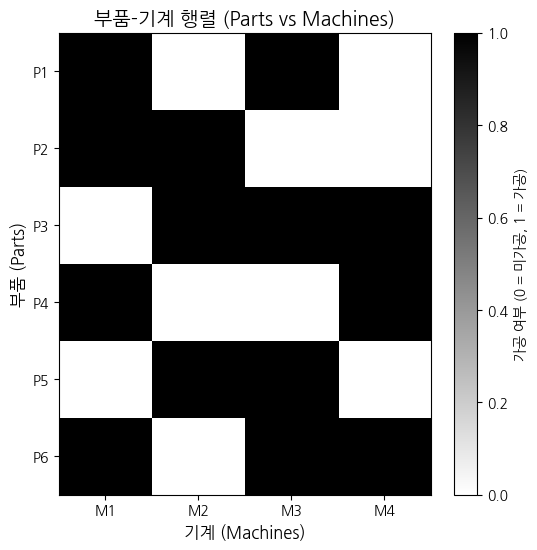

In [10]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 부품-기계 행렬 시각화
plt.figure(figsize=(6, 6))
plt.imshow(P_M_matrix, cmap='binary', aspect='auto')
plt.colorbar(label='가공 여부 (0 = 미가공, 1 = 가공)')
plt.title('부품-기계 행렬 (Parts vs Machines)', fontsize=14)
plt.xlabel('기계 (Machines)', fontsize=12)
plt.ylabel('부품 (Parts)', fontsize=12)
plt.xticks(ticks=np.arange(P_M_matrix.shape[1]), labels=['M1', 'M2', 'M3', 'M4'])
plt.yticks(ticks=np.arange(P_M_matrix.shape[0]), labels=['P1', 'P2', 'P3', 'P4', 'P5', 'P6'])
plt.show()


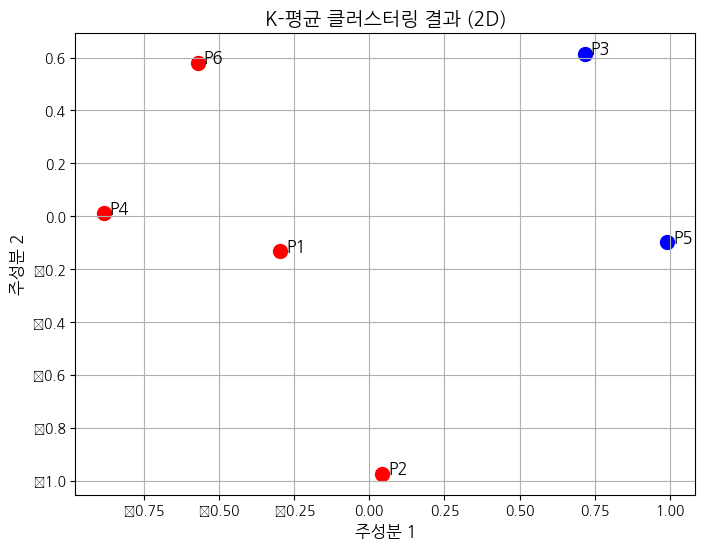

In [11]:
from sklearn.decomposition import PCA

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
P_M_matrix_2D = pca.fit_transform(P_M_matrix)

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(len(P_M_matrix)):
    plt.scatter(P_M_matrix_2D[i, 0], P_M_matrix_2D[i, 1], color=colors[labels[i]], label=f'P{i+1}', s=100)

plt.title('K-평균 클러스터링 결과 (2D)', fontsize=14)
plt.xlabel('주성분 1', fontsize=12)
plt.ylabel('주성분 2', fontsize=12)
plt.grid(True)

# 부품에 대한 레이블 추가
for i in range(P_M_matrix.shape[0]):
    plt.text(P_M_matrix_2D[i, 0]+0.02, P_M_matrix_2D[i, 1], f'P{i+1}', fontsize=12)

plt.show()


클러스터링 결과 시각화 (차원 축소 적용)

  K-평균 클러스터링 결과를 시각화하기 위해 차원 축소(Dimensionality Reduction) 기법인 **PCA(Principal Component Analysis)**를 적용하여 2차원 평면에 각 부품의 위치를 나타낼 수 있습니다.